In [1]:
# PCA

In [2]:
import numpy as np
import pandas as pd
import os

def Add_common_header(df,common_header):
    name_list=[common_header]*len(df.columns)
    tuples = list(zip(name_list,df.columns))
    df.columns = pd.MultiIndex.from_tuples(tuples)
    return df


def DIR_CHECK_CREATE(Input_Path):
    if (not os.path.isdir(Input_Path)):
        print ("New Dir Made is" + Input_Path)
        os.mkdir(Input_Path)
    else: 
        print ('Dir Exists')

# Plot Package
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# display plots in this notebook
%matplotlib inline

In [33]:
import glob

RAW_PATH = '/home/xli/Data/Haihui/Vladimir/ATAC_Seq/RPKM/'
#os.chdir(RAW_PATH)#
INPUT_LIST = os.listdir(RAW_PATH)
File_Name="RPKM_read_count"
RPKM_Set=glob.glob(RAW_PATH+File_Name+'_*.csv')

index_prefix = 1+len(RAW_PATH+File_Name)

df=pd.DataFrame(columns=['gene_id'])
for x in RPKM_Set:
    print (x[index_prefix:-4])
    df_tem=pd.read_csv(x,sep='\t').rename(columns={'RPKM':x[index_prefix:-4]})
    df=df.merge(df_tem, on='gene_id',how='outer')
df_ALL_DEGs=df.set_index('gene_id')

P14_CLP1_union_peaks_50423
P14_CLP4_union_peaks_50423
P14_CLP3_union_peaks_50423
P14_Sham3_union_peaks_50423
P14_Sham1_union_peaks_50423
P14_Sham2_union_peaks_50423
P14_CLP2_union_peaks_50423


In [35]:
df_ALL_DEGs.head()

,P14_CLP1_union_peaks_50423,P14_CLP4_union_peaks_50423,P14_CLP3_union_peaks_50423,P14_Sham3_union_peaks_50423,P14_Sham1_union_peaks_50423,P14_Sham2_union_peaks_50423,P14_CLP2_union_peaks_50423
gene_id,,,,,,,
id_1,18.929656,26.873748,23.267202,21.048621,18.070650,22.761015,19.937639
id_2,9.301591,11.162943,10.899158,8.821263,8.733089,11.182043,9.958659
id_3,14.358946,12.628880,17.284411,28.805003,15.149698,21.165538,15.169149
id_4,44.717614,40.064918,44.546588,33.672607,42.647521,44.993271,43.163729
id_5,49.102698,58.541291,55.637326,63.106432,56.139359,55.781667,52.094599


In [71]:
# PCA
df_2 = df_ALL_DEGs #.reset_index()

#### Remove unicode of list in python 
df2_gene_id = df_2.index #[x.encode('ascii', 'ignore') for x in df_2.index.values]


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#### In here we set targets as the name of columns, which means our purpose is to compare \
#### the relationship between different columns.
targets=df_2.columns #[x.encode('ascii', 'ignore') for x in df_2.columns]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

################################################################################

df_2_T = df_2.transpose()

# Separating out the features
x = df_2_T.loc[ :, df2_gene_id ].values


# Separating out the target
y = df_2_T.loc[targets,:].values


# Standardizing the featuresbio
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'] )


########### THIS is fucking killing me. reindex df with df2, just using following command.
principalDf.index = df_2_T.index

#finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
principalDf=principalDf.sort_index()
targets=  principalDf.index #[x.encode('ascii', 'ignore') for x in principalDf.index]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

print ("PCA Number of Components:" + str(pca.n_components_)  )
print ("PCA Explained Variance Ratio: " + str(pca.explained_variance_ratio_) )  
principalDf


PCA Number of Components:3
PCA Explained Variance Ratio: [0.34252036 0.23290472 0.12278253]


['P14_CLP', 'P14_SHAM', 'Tcf1$^{-/-}$Lef1$^{-/-}$, stim', 'WT, naive']

Text(0.5, 1.0, 'Explained Variance Ratio \n PC1 = 0.343  &  PC2 = 0.233  &  PC3 = 0.123')

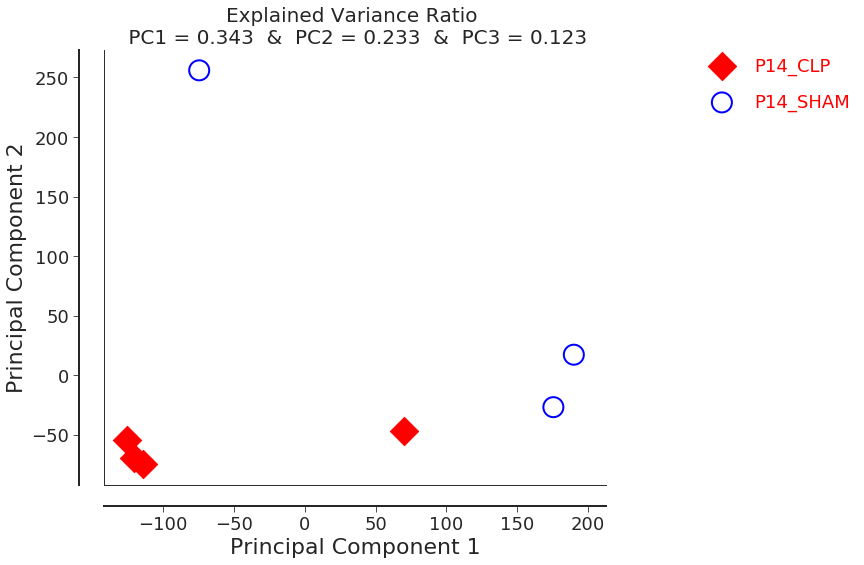

In [70]:
#########################################################################
label_set = ['P14_CLP', 'P14_SHAM', 'Tcf1$^{-/-}$Lef1$^{-/-}$, stim', 'WT, naive']
#########################################################################
### PLOT
#matplotlib.rcParams['font.sans-serif'] = ['Arial'] #, ['sans-serif']

fig = plt.figure(figsize = (9,8))
ax = fig.add_subplot(1,1,1) 

#ax.set_title('Two components PCA', fontsize = 20)

colors = ['red','red','red', 'red',
          'blue','blue','blue',
          'red','red','red',
          'blue','blue','blue']

filled_markers = ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')

i=0
s_size=400
alpha_value=1
for target, color in zip( targets,colors):
    i+=1
    indicesToKeep = principalDf.index == target
    if (i in {0,1,2,3,4}):
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, c=color, alpha=alpha_value, marker="D", label=label_set[0] if i%3 == 0 else '')
    elif(i in {5,6,7}):
         ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, alpha=alpha_value, facecolors='none', 
                    edgecolors=color, linewidths=2, label=label_set[1] if i%3 == 0 else '')
    elif (i in {10,11,12}):
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, alpha=alpha_value, marker="D", facecolors='none', 
                   edgecolors=color, linewidths=2, label=label_set[2] if i%3 == 0 else '')
    else:
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, c=color, alpha=alpha_value, label=label_set[3] if i%3 == 0 else '')

    

legend_object = ax.legend(loc="upper right", bbox_to_anchor=(0.50,1, 1,0),edgecolor='w',
          borderaxespad=0,fancybox=True, shadow=False,  fontsize=18, labelspacing=1.0)

# change the font colors to match the line colors:
i=0
for text in legend_object.get_texts():
    text.set_color(colors[i*3])
    i+=1
#ax.set_xlim(-2,8)
#ax.grid(off)



ax2 = ax.twiny()
ax3 = ax.twinx()
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.05))
ax2.spines["bottom"].set_linewidth(2)
ax3.spines["left"].set_position(("axes", -0.05))
ax3.spines["left"].set_linewidth(2)


#ax2.set_frame_on(True)
#ax3.set_frame_on(True)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

ax2.set_xlim(ax.get_xlim())
ax3.set_ylim(ax.get_ylim())
ax2.tick_params(axis='x',which='major', direction='out', length=6, labelsize=18)
ax2.tick_params(axis='x',which='minor', direction='out', length=6, labelsize=18)
ax3.tick_params(axis='y',which='major', direction='out', length=6, labelsize=18)
ax3.tick_params(axis='y',which='minor', direction='out', length=6, labelsize=18)

ax2.set_xlabel('Principal Component 1', fontsize = 22, fontname='Arial')
ax3.set_ylabel('Principal Component 2', fontsize = 22, fontname="Arial")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


Parameters_Detail='Vlad_PCA_'
ax.set_title('Explained Variance Ratio \n PC1 = ' + str(round(pca.explained_variance_ratio_[0],3))+
             '  &  PC2 = '+str(round(pca.explained_variance_ratio_[1],3)) +
             '  &  PC3 = '+str(round(pca.explained_variance_ratio_[2],3)), fontsize = 20)
#fig.savefig('PCA'+Parameters_Detail+'.png')

(50423, 7)

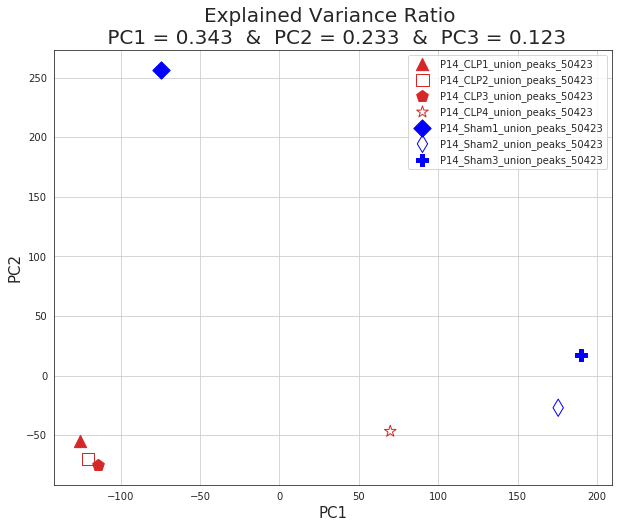

In [75]:
### PLOT
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Explained Variance Ratio \n PC1 = ' + str(round(pca.explained_variance_ratio_[0],3))+
             '  &  PC2 = '+str(round(pca.explained_variance_ratio_[1],3)) +
             '  &  PC3 = '+str(round(pca.explained_variance_ratio_[2],3)), fontsize = 20)

#WT-na Red C3 DKO-na Green C2 WT-s Blue C9  DKO-s Navy C0

colors = ['C3','C3','C3','C3','b','b','b',
          'C2',
          'b','b','C0','C0',
          'C3','C3','b','b',
          'C2','C2','C0','C0']

i=0
filled_markers = ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')


for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    i+=1
    order_replicates=i%(len(filled_markers))
    if (i%2 == 0):
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = 150, edgecolor=color, facecolor='none', marker=filled_markers[order_replicates])
    else:
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = 150, c=color,marker=filled_markers[order_replicates])
    
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='CD8_HP'
fig.savefig('PCA'+Parameters_Detail+'.png')
df_ALL_DEGs.shape